<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/product-analytics/product_growth_metrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Product Growth Metrix

In [1]:
#@title ## Setup
#@markdown * Import dependencies
#@markdown * Download dataset (UCI Online Retail II Data Set)
#@markdown ---
#@markdown **Data Set Information:**
#@markdown This Online Retail II data set contains all the transactions 
#@markdown occurring for a UK-based and registered, non-store online retail 
#@markdown between 01/12/2009 and 09/12/2011.The company mainly sells unique 
#@markdown all-occasion gift-ware. Many customers of the company are wholesalers.

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx -q


from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(font_scale=1)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
online_retail_ds_url = 'Online Retail.xlsx'
df_txn = pd.read_excel(online_retail_ds_url, 
                   dtype={'CustomerID': str,  'InvoiceID': str},
                   parse_dates=['InvoiceDate'],
                   infer_datetime_format=True)
df_txn.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [3]:
df_txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df_txn.dropna(subset=['CustomerID'], inplace=True)
df_txn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


**Revenue** = Active Customer Count * Order Count * Average Revenue per Order

In [5]:
df_txn['InvoiceYearMonth'] = df_txn['InvoiceDate'].dt.to_period('M')
df_txn['Revenue'] = df_txn['Quantity'] * df_txn['UnitPrice']
df_revenue = df_txn.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
df_revenue.head(5)

,InvoiceYearMonth,Revenue
0,2010-12,554604.020
1,2011-01,475074.380
2,2011-02,436546.150
3,2011-03,579964.610
4,2011-04,426047.851


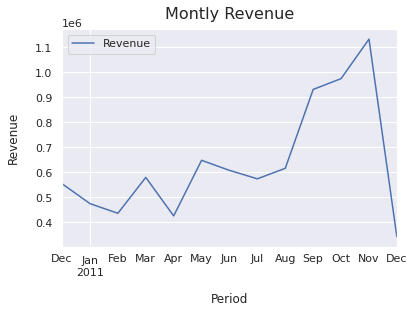

In [6]:
df_revenue.plot.line(x='InvoiceYearMonth', y='Revenue')
plt.xlabel('Period', labelpad=15)
plt.ylabel('Revenue', labelpad=15)
plt.title('Montly Revenue', y=1.02, fontsize=16);

## Monthly Revenue Growth Rate

In [32]:
df_revenue['MonthlyGrowth'] = df_revenue['Revenue'].pct_change()
df_revenue.head(5)

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,2010-12,554604.020,NaN
1,2011-01,475074.380,-0.143399
2,2011-02,436546.150,-0.081099
3,2011-03,579964.610,0.328530
4,2011-04,426047.851,-0.265390


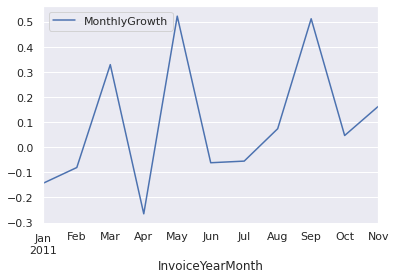

In [37]:
df_revenue[1:-1].plot(x='InvoiceYearMonth', y='MonthlyGrowth');

## Monthly Active Customers

In [65]:
df_monthly_active_users = df_txn[df_txn['Country'] == 'United Kingdom'].groupby('InvoiceYearMonth')['CustomerID'].nunique()
df_monthly_active_users.head(5)

InvoiceYearMonth
2010-12    871
2011-01    684
2011-02    714
2011-03    923
2011-04    817
Freq: M, Name: CustomerID, dtype: int64

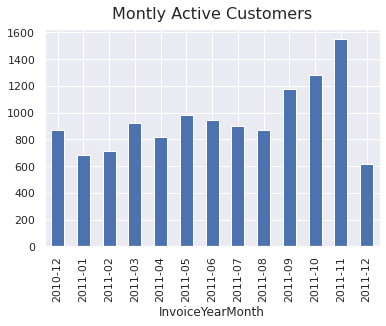

In [69]:
df_monthly_active_users.plot.bar()
plt.title('Montly Active Customers', y=1.02, fontsize=16);